In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
def u(x,a,s):
    if a == 0:
        return (1/6*s)*x + 0.5
    else: 
        def b(x):
            return 1-math.e**(-a*x)
        return (b(x)-b(-3*s))/(b(3*s)-b(-3*s))
    
def us(x_list, a, s): #utility function for the list of values           
    return [u(x, a, s) for x in x_list]

In [3]:
u_list = np.random.normal(0,1,1000)

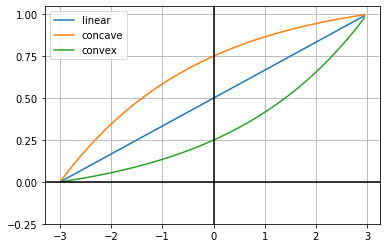

In [6]:
X = np.arange(-3,3,0.05)
Y1 = [u(x,0.367,1) for x in X]
Y2 = [u(x,-0.367,1) for x in X]
Y3 = [u(x,0,1) for x in X] 
plt.plot(X,Y3, label='linear') 
plt.plot(X,Y1, label='concave') 
plt.plot(X,Y2, label='convex') 
plt.axvline(0, color='k')
plt.axhline(0, color='k')

import matplotlib.ticker as plticker


plt.yticks(np.arange(-.25, 1.25, 0.25))

plt.grid(which='major', axis='both', linestyle='-')
plt.legend()

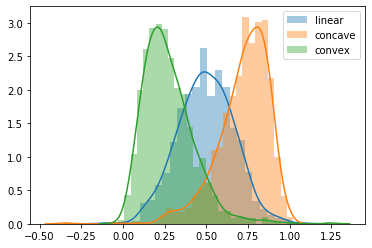

In [8]:
xs = np.random.normal(0,1,1000)
sns.distplot(us(xs, 0, 1), label='linear')
sns.distplot(us(xs, 0.367, 1), label='concave')
sns.distplot(us(xs, -0.367, 1), label='convex')
plt.legend()

## Selection Bias - single attribute 

In [15]:
def cal_post(m, mu=0, s=1, t=1, a=0):
    d_list = []
    for i in range(10000):
        #Generate $m$ true values $x_j$ from the prior
        x = np.random.normal(mu,s,m) #x_j~N(0,1)
        u_x = us(x, a, s)
        
        #For each true value, generate an estimate $y_j$ from the likelihood 
        y = [np.random.normal(x_j,t,1)[0] for x_j in x] #y_j~N(x_j,1)
        u_y = us(y, a, s)
        
        max_uy = max(u_y)
        max_j = u_y.index(max_uy)
        
        #posterior disappointment 
        d = (u_x[max_j] - max_uy)/max_uy
        
        d_list.append(d)
    #Compute the difference $u(x_\tilde{j})-\sum_{k=1}^1000 u_(x_\tilde{j}k)$
    return d_list


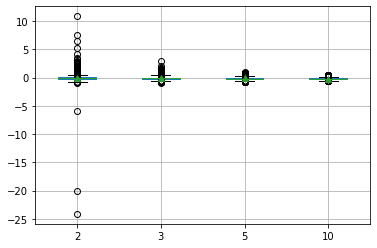

2    -0.058629
3    -0.113584
5    -0.161358
10   -0.202196
dtype: float64


In [16]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post(m, a=0)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

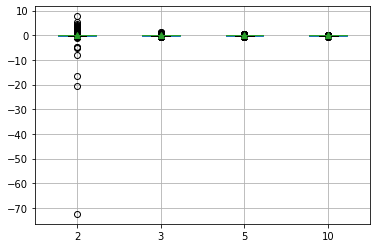

2    -0.040248
3    -0.061510
5    -0.079005
10   -0.089929
dtype: float64


In [20]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post(m, a=0.367)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

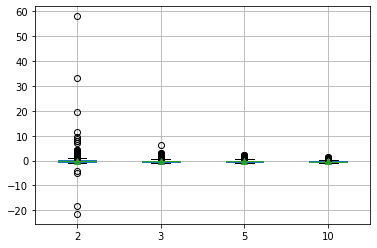

2    -0.059125
3    -0.177807
5    -0.266417
10   -0.348075
dtype: float64


In [21]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post(m, a=-0.367)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

## Selection Bias - multi attribute 

In [5]:
def cal_post_mu(m=5, mu=[0,0,0], s=[1,1,1], t=[1,1,1], w=[1/3, 1/3, 1/3], a=[0,0,0]):
    
    def cal_u(multiatt):
        ul = [u(multiatt[i], a[i], 1) for i in range(len(multiatt))]
        return np.dot(w, ul)
    
    d_list = []
    for k in range(1000):
        x = []
        eu = []
        
        for j in range(m): #loop for generating mu alternatives
            
            n = len(mu) #number of attributes
            x_j = [np.random.normal(mu[i], s[i],1)[0] for i in range(n)] #generate true mu of one alternative
            x.append(cal_u(x_j)) #append the utility of one mu alternative u(x_j)
            
            y_j = [np.random.normal(x_j[i], t[i],1)[0] for i in range(n)] #generate estimated mu of one alternative
            
            eu.append(cal_u(y_j)) #append the utility of one mu estimates u(y_j)

        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)

        #posterior disappointment 
        d = (x[max_j] - max_eu)/max_eu
        d_list.append(d)
        #Compute the difference $u(x_\tilde{j})-\sum_{k=1}^1000 u_(x_\tilde{j}k)$
    return d_list

# Varying number of alternatives

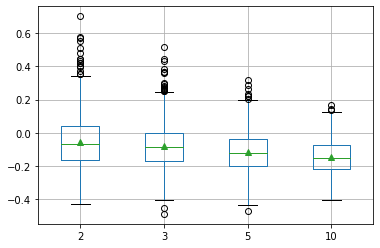

2    -0.054068
3    -0.079436
5    -0.116094
10   -0.146299
dtype: float64


In [17]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

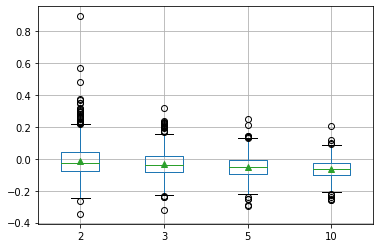

2    -0.011065
3    -0.031497
5    -0.050285
10   -0.063209
dtype: float64


In [19]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, a = [0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

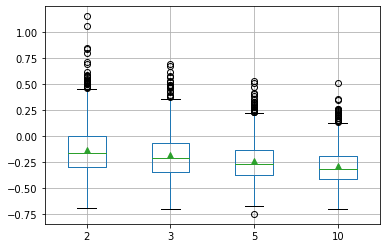

2    -0.128894
3    -0.182448
5    -0.241250
10   -0.289587
dtype: float64


In [20]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, a = [-0.367]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

# varying number of attributes 

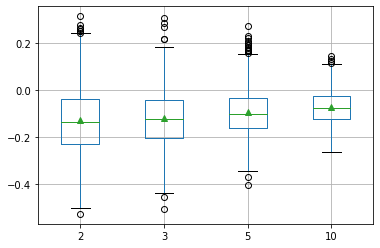

2    -0.128096
3    -0.116809
5    -0.090628
10   -0.071066
dtype: float64


In [21]:
d = {}
for n in [2,3,5,10]:
    d[n] = cal_post_mu(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[1/n]*n, a=[0]*n )
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

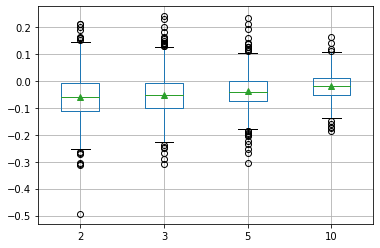

2    -0.057705
3    -0.052986
5    -0.037394
10   -0.019253
dtype: float64


In [22]:
d = {}
for n in [2,3,5,10]:
    d[n] = cal_post_mu(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[1/n]*n, a=[0.367]*n )
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

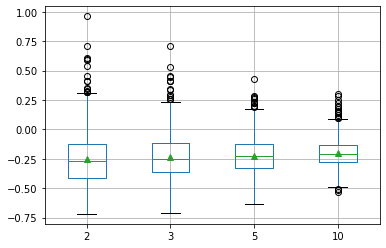

2    -0.248979
3    -0.233396
5    -0.222820
10   -0.201137
dtype: float64


In [23]:
d = {}
for n in [2,3,5,10]:
    d[n] = cal_post_mu(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[1/n]*n, a=[-0.367]*n )
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

# Varying criterion-specific uncertainty

## attribute specific absolute disappointment

In [8]:
def cal_post_mu(m=5, mu=[0,0,0], s=[1,1,1], t=[1,1,1], w=[1/3, 1/3, 1/3], a=[0,0,0]):
    
    def cal_u(multiatt):
        ul = [u(multiatt[i], a[i], 1) for i in range(len(multiatt))]
        return np.dot(w, ul)
    
    d_list = []
    d_mu_list = []
    for k in range(10000):
        x = []
        eu = []
        
        mx = []
        meu = []
        for j in range(m): #loop for generating mu alternatives
            
            n = len(mu) #number of attributes
            x_j = [np.random.normal(mu[i], s[i],1)[0] for i in range(n)] #generate true mu of one alternative
            x.append(cal_u(x_j)) #append the utility of one mu alternative u(x_j)           
            ux_j= np.array([u(x_j[i], a[i],1) for i in range(n)]) #utilities of individual attributes
            mx.append(ux_j)
            
            y_j = [np.random.normal(x_j[i], t[i],1)[0] for i in range(n)] #generate estimated mu of one alternative            
            eu.append(cal_u(y_j)) #append the utility of one mu estimates u(y_j)
            uy_j = np.array([u(y_j[i], a[i],1) for i in range(n)]) #utilities of individual attributes
            meu.append(uy_j)
            
        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)

        #disappointment 
        d = (x[max_j] - max_eu)#/max_eu
        d_mu = (mx[max_j]-meu[max_j])#/meu[max_j]
        d_list.append(d)
        d_mu_list.append(d_mu)
        
        #Compute the difference $u(x_\tilde{j})-\sum_{k=1}^1000 u_(x_\tilde{j}k)$
    return d_list, d_mu_list

## overall disappointment

Varying attribute-specific estimation uncertainty 

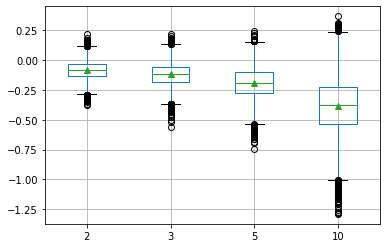

2    -0.085110
3    -0.118278
5    -0.193497
10   -0.386742
dtype: float64


In [13]:
n = 5
d = {}
for s2 in [2,3,5,10]:
    d[s2] = cal_post_mu(m=5, mu=[0]*n, s=[1]*n, t=[1,1,s2,1,1], w=[1/n]*n, a=[0]*n )[0]

df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

Varying attribute-specific weight

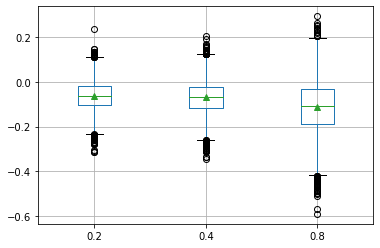

0.2   -0.061260
0.4   -0.069019
0.8   -0.110863
dtype: float64


In [16]:
n = 5

w1=[1/n]*5
w2=[0.4, 0.15, 0.15, 0.15, 0.15]
w3=[0.8, 0.05, 0.05, 0.05, 0.05]

d = {}
for wi in [w1, w2, w3]:
    d[wi[0]] = cal_post_mu(m=5, mu=[0]*n, s=[1]*n, t=[1]*n, w=wi, a=[0]*n )[0]
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

## attribute specific absolute disappointment

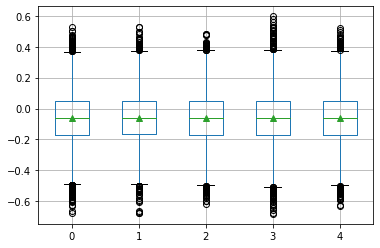

0   -0.061851
1   -0.059135
2   -0.060611
3   -0.062641
4   -0.060986
dtype: float64


In [83]:
n = 5
r = cal_post_mu(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[1/n]*n, a=[0]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

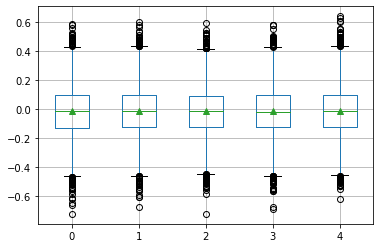

0   -0.017849
1   -0.015492
2   -0.016558
3   -0.017902
4   -0.015937
dtype: float64


In [87]:
n = 5
r = cal_post_mu(m=5, mu=[0]*n,s=[1,1,10,1,5], t=[1]*n, w=[1/n]*n, a=[0]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

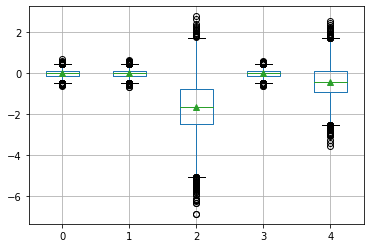

0   -0.017354
1   -0.019856
2   -1.680257
3   -0.015081
4   -0.416937
dtype: float64


In [86]:
n = 5
r = cal_post_mu(m=5, mu=[0]*n,s=[1]*n, t=[1,1,10,1,5], w=[1/n]*n, a=[0]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

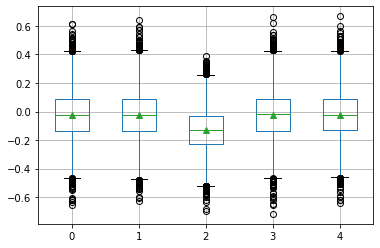

0   -0.022905
1   -0.022680
2   -0.129569
3   -0.021312
4   -0.021716
dtype: float64


In [92]:
n = 5
r = cal_post_mu(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[0.1, 0.1, 0.6, 0.1, 0.1], a=[0]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

## attribute specific relative disappointment

In [3]:
def cal_post_mu2(m=5, mu=[0,0,0], s=[1,1,1], t=[1,1,1], w=[1/3, 1/3, 1/3], a=[0,0,0]):
    
    def cal_u(multiatt):
        ul = [u(multiatt[i], a[i], 1) for i in range(len(multiatt))]
        return np.dot(w, ul)
    
    d_list = []
    d_mu_list = []
    for k in range(10000):
        x = []
        eu = []
        
        mx = []
        meu = []
        for j in range(m): #loop for generating mu alternatives
            
            n = len(mu) #number of attributes
            x_j = [np.random.normal(mu[i], s[i],1)[0] for i in range(n)] #generate true mu of one alternative
            x.append(cal_u(x_j)) #append the utility of one mu alternative u(x_j)           
            ux_j= np.array([u(x_j[i], a[i],1) for i in range(n)]) #utilities of individual attributes
            mx.append(ux_j)
            
            y_j = [np.random.normal(x_j[i], t[i],1)[0] for i in range(n)] #generate estimated mu of one alternative            
            eu.append(cal_u(y_j)) #append the utility of one mu estimates u(y_j)
            uy_j = np.array([u(y_j[i], a[i],1) for i in range(n)]) #utilities of individual attributes
            meu.append(uy_j)
            
        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)

        #disappointment 
        d = (x[max_j] - max_eu)/max_eu
        d_mu = (mx[max_j]-meu[max_j])/meu[max_j]
        d_list.append(d)
        d_mu_list.append(d_mu)
        
        #Compute the difference $u(x_\tilde{j})-\sum_{k=1}^1000 u_(x_\tilde{j}k)$
    return d_list, d_mu_list

## overall disappointment

Varying attribute-specific estimation uncertainty 

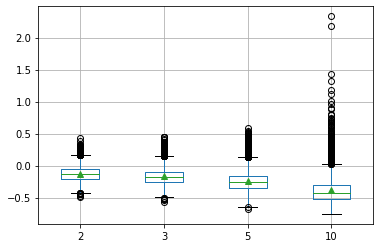

2    -0.128040
3    -0.170327
5    -0.245422
10   -0.387488
dtype: float64


In [17]:
n = 5
d = {}
for s2 in [2,3,5,10]:
    d[s2] = cal_post_mu2(m=5, mu=[0]*n, s=[1]*n, t=[1,1,s2,1,1], w=[1/n]*n, a=[0]*n )[0]

df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

Varying attribute-specific weight

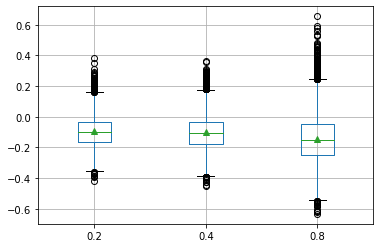

0.2   -0.094601
0.4   -0.101817
0.8   -0.142537
dtype: float64


In [18]:
n = 5

w1=[1/n]*5
w2=[0.4, 0.15, 0.15, 0.15, 0.15]
w3=[0.8, 0.05, 0.05, 0.05, 0.05]

d = {}
for wi in [w1, w2, w3]:
    d[wi[0]] = cal_post_mu2(m=5, mu=[0]*n, s=[1]*n, t=[1]*n, w=wi, a=[0]*n )[0]
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

Attribute-specific

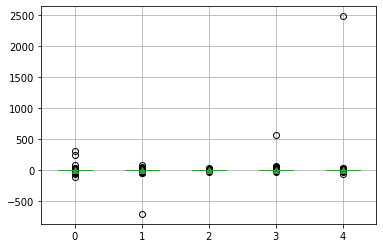

0    0.021299
1   -0.087968
2   -0.020819
3    0.050551
4    0.225529
dtype: float64


In [22]:
n = 5
r = cal_post_mu2(m=5, mu=[0]*n,s=[1]*n, t=[1,1,1,1,1], w=[1/n]*n, a=[0]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

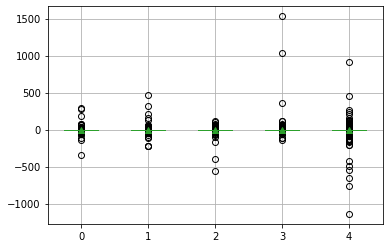

0    0.086053
1    0.161089
2   -0.767975
3    0.395293
4   -0.749615
dtype: float64


In [91]:
n = 5
r = cal_post_mu2(m=5, mu=[0]*n,s=[1]*n, t=[1,1,10,1,5], w=[1/n]*n, a=[0]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

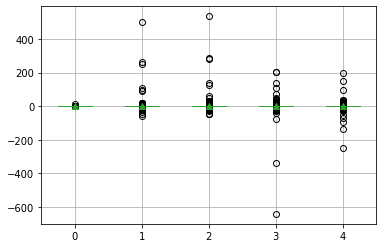

0   -0.122549
1    0.148549
2    0.157224
3    0.017789
4    0.024496
dtype: float64


In [9]:
n = 5

w1=[1/n]*5
w2=[0.4, 0.15, 0.15, 0.15, 0.15]
w3=[0.8, 0.05, 0.05, 0.05, 0.05]

r = cal_post_mu2(m=5, mu=[0]*n, s=[1]*n, t=[1]*n, w=w2, a=[0]*n)
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

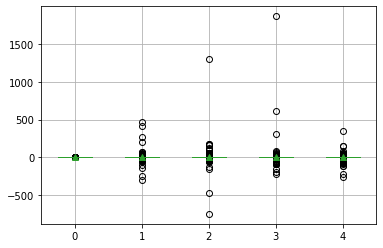

0   -0.161862
1    0.202622
2    0.204846
3    0.313942
4    0.020384
dtype: float64


In [5]:
n = 5

w1=[1/n]*5
w2=[0.4, 0.15, 0.15, 0.15, 0.15]
w3=[0.8, 0.05, 0.05, 0.05, 0.05]

r = cal_post_mu2(m=5, mu=[0]*n, s=[1]*n, t=[1]*n, w=w3, a=[0]*n)
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))